## Titanic Data Project

The train set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The dataset consist of many data such as:-
* PassengerID
* Survived
* Pclass
* Name
* Sex
* Age
* SibSp
* Parch
* Ticket
* Fare
* Cabin
* Embarked

## Data and Setup

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
titanic=pd.read_csv(r'C:\Users\Yash mishra\Desktop\Titanic Project\train.csv')

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

Creating the heatmap to get which parameter contain null valves 

<Axes: >

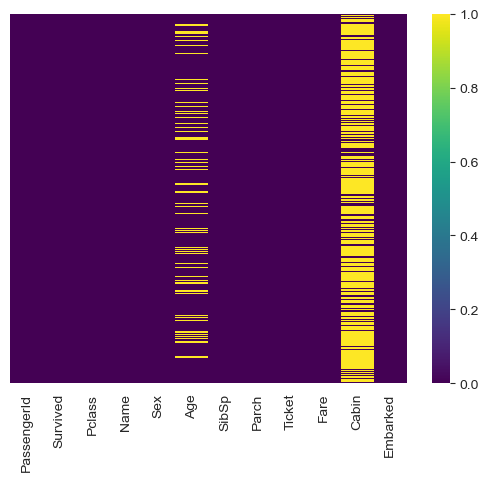

In [88]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: title={'center': 'Survived vs Not Survived'}, xlabel='Survived', ylabel='count'>

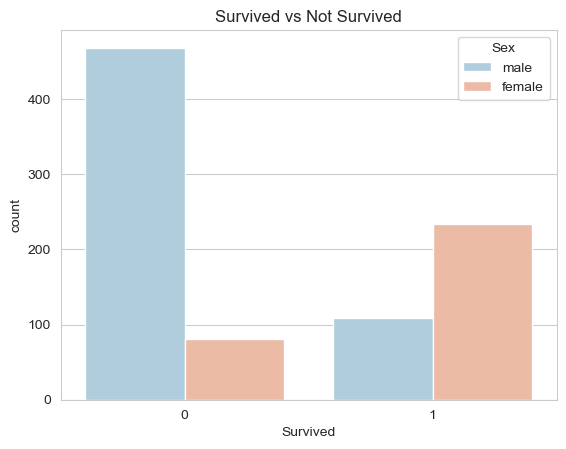

In [89]:
# Using Countplot() to plot the survived passengers cound on the basis of gender
sns.set_style('whitegrid')
plt.title('Survived vs Not Survived')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

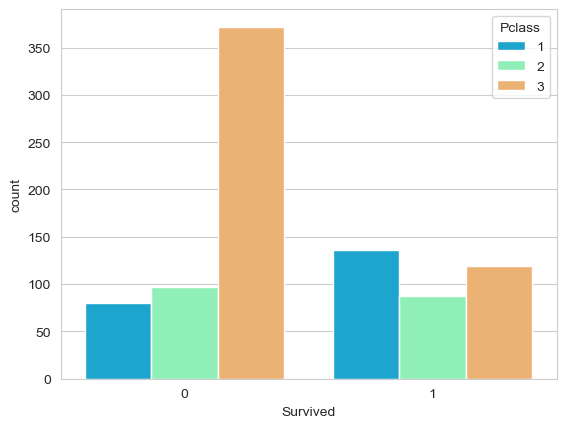

In [90]:
# Using Countplot() to plot the survived passengers cound on the basis of Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

<Axes: xlabel='Age'>

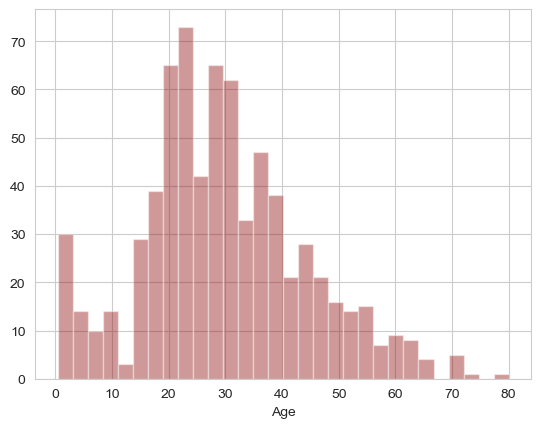

In [91]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

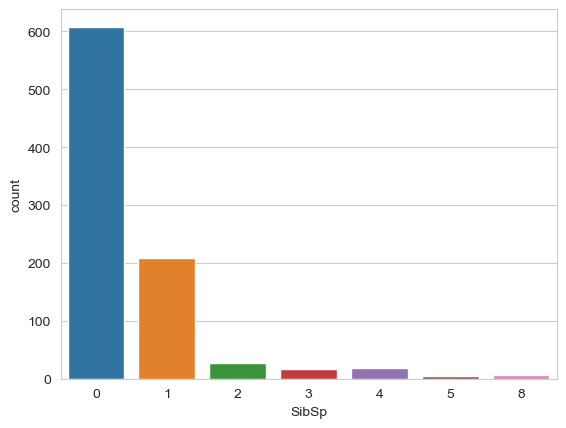

In [92]:
# Using the countplot() to plot the SibSp data vs count
sns.countplot(x='SibSp',data=titanic)

<Axes: xlabel='Fare'>

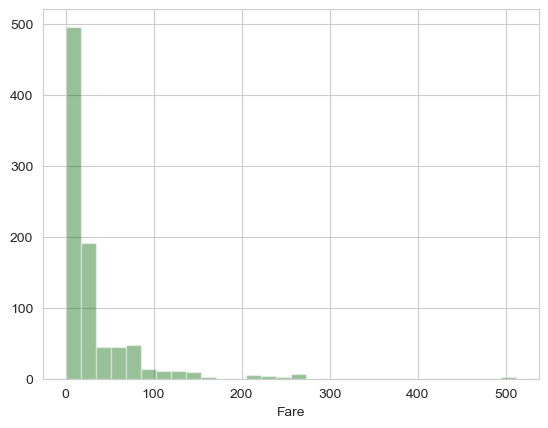

In [93]:
sns.distplot(titanic['Fare'],kde=False,bins=30,color='darkgreen')

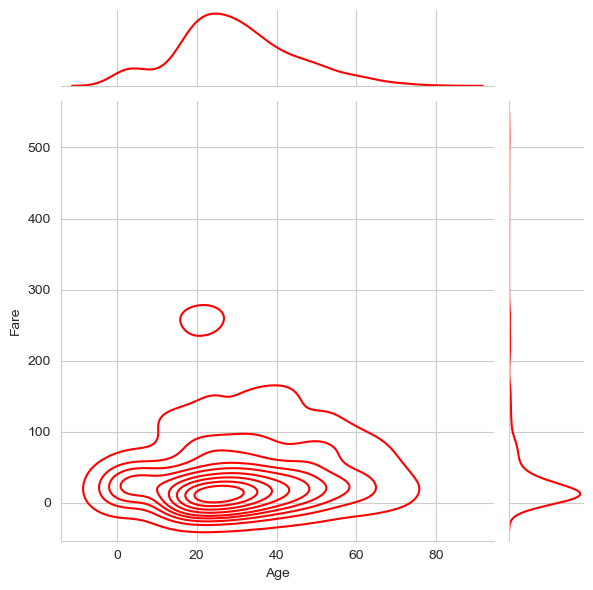

In [94]:
# Using the jointplot() between Age on X-axis and Fare on Y-axis
sns.jointplot(x='Age',y='Fare',data=titanic,color='red',kind='kde');

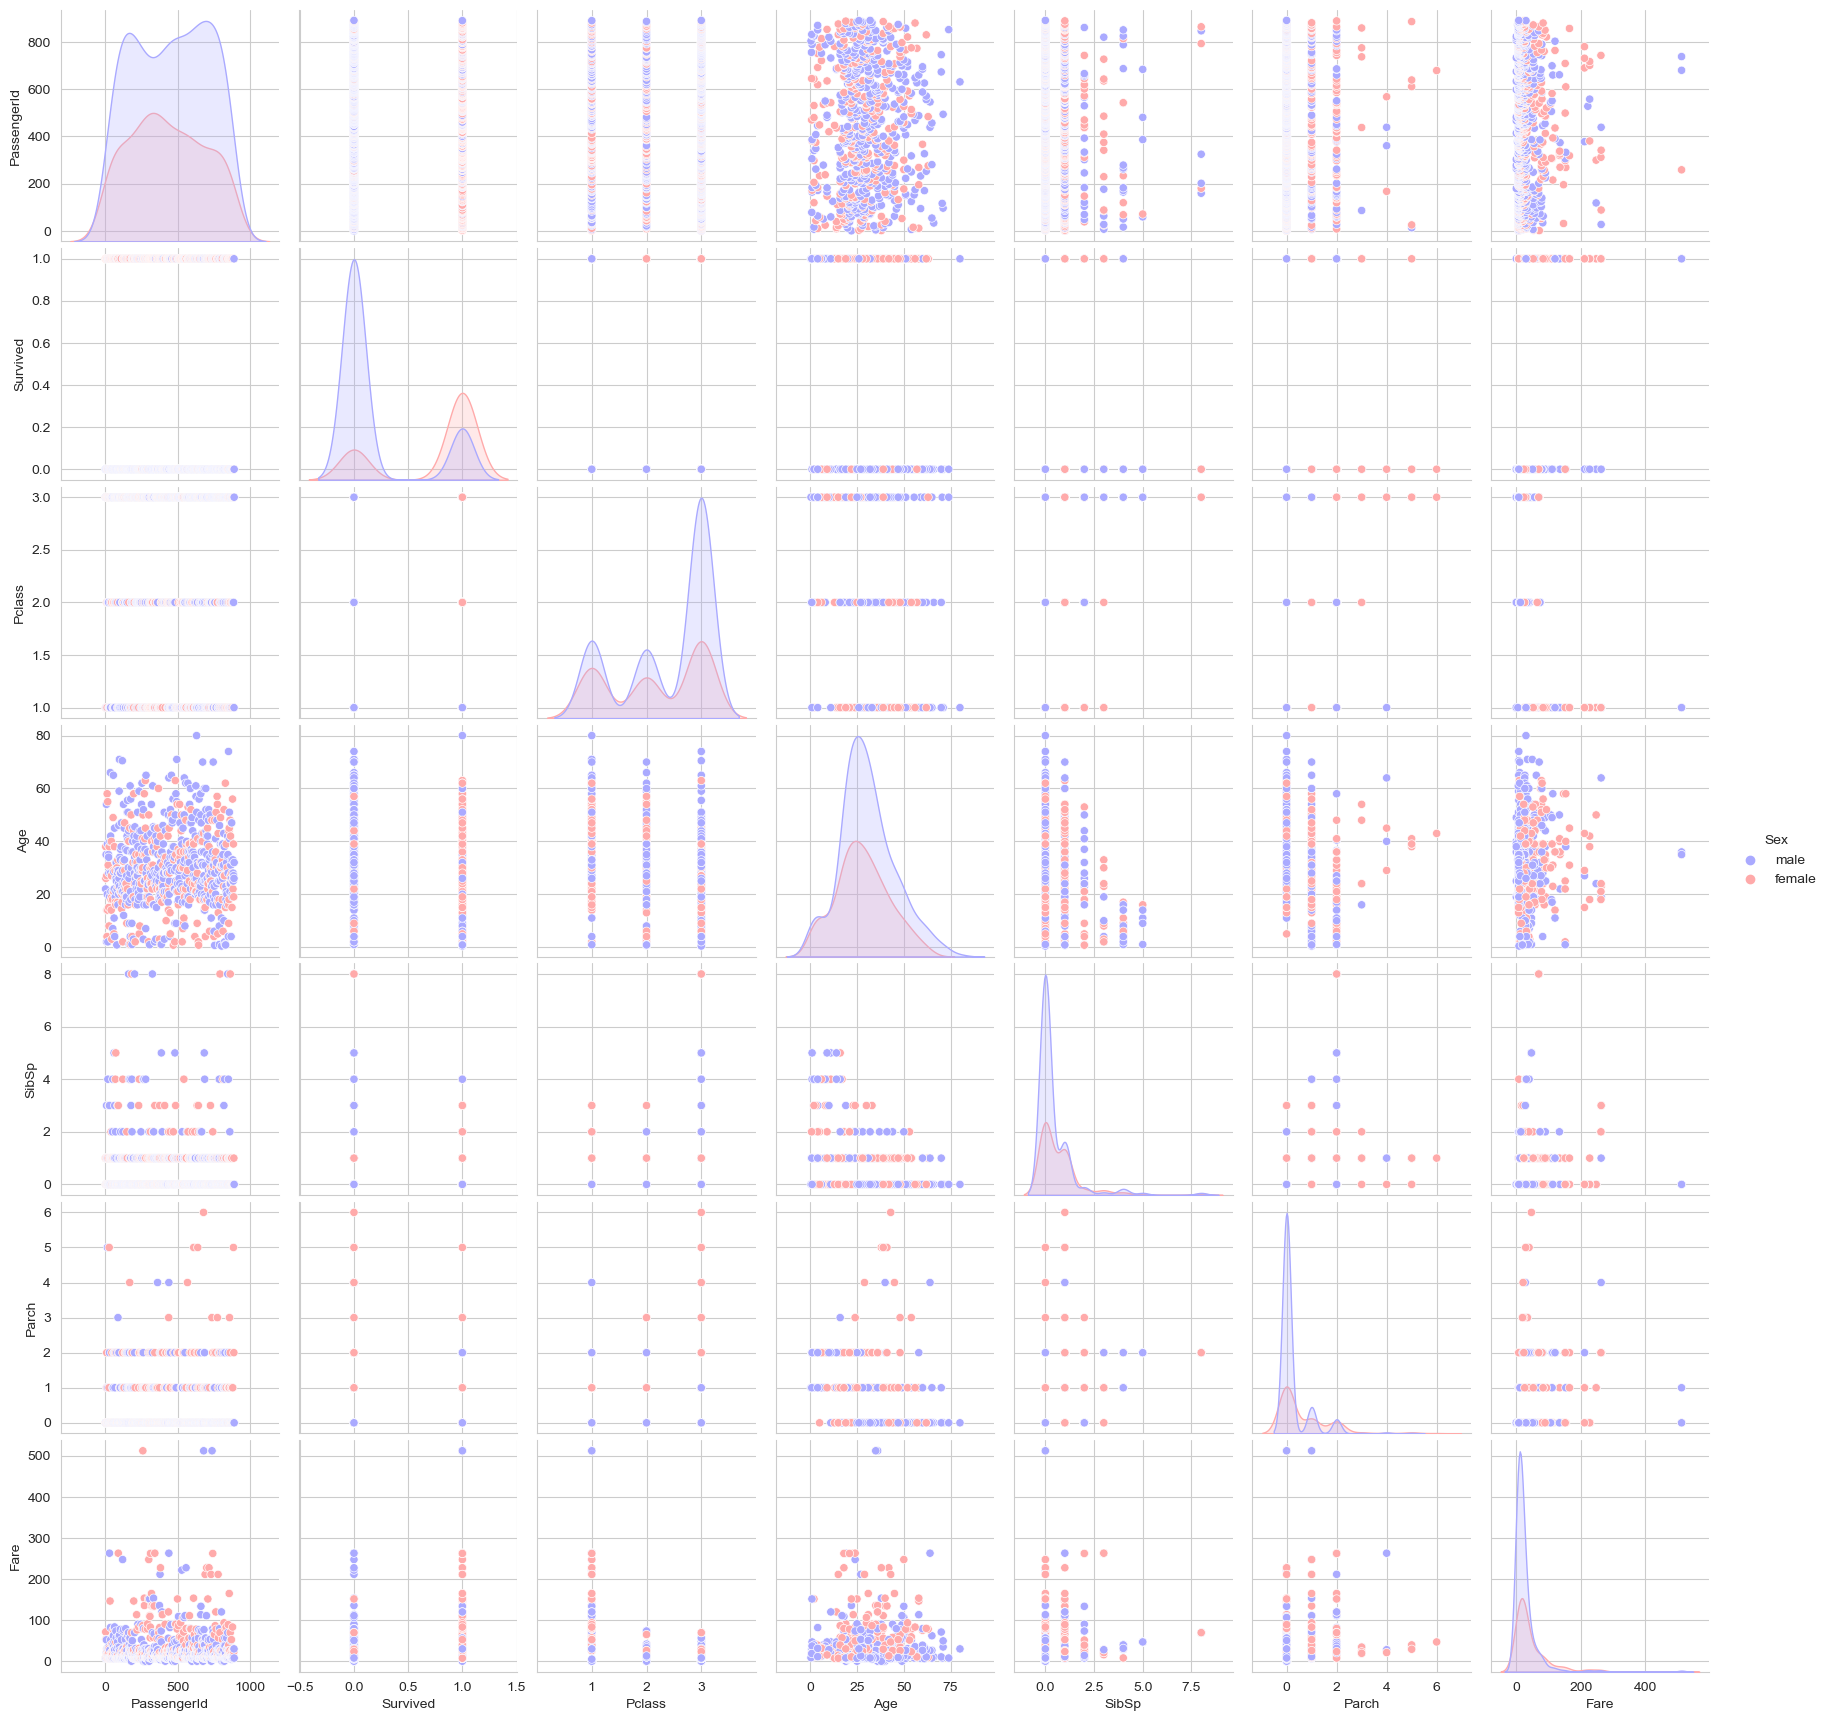

In [95]:
# Using the pairplot() to know graphs of different features
sns.pairplot(titanic,hue='Sex',palette='bwr')

<Axes: xlabel='Pclass', ylabel='Age'>

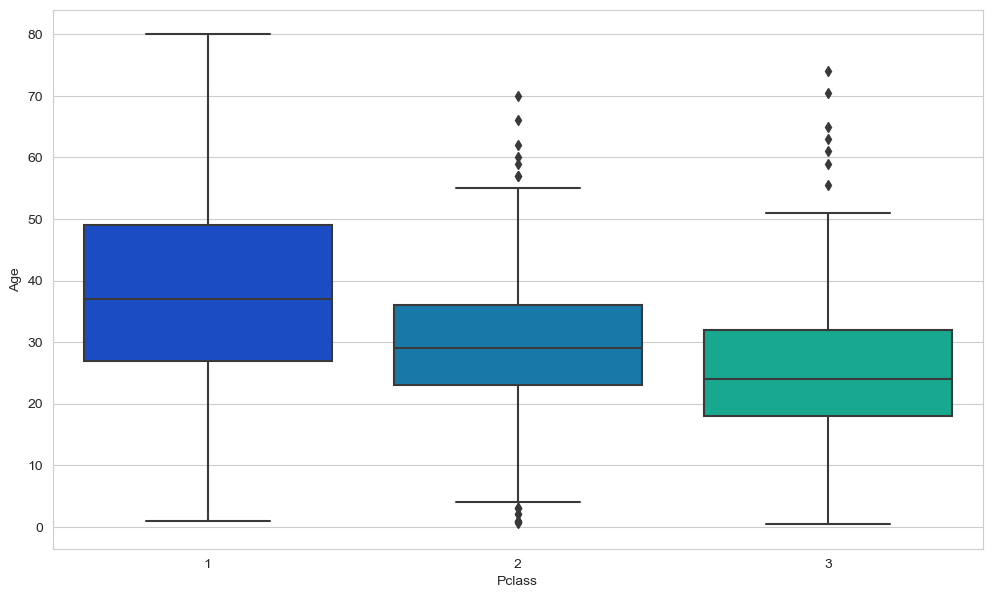

In [96]:
# Using the boxplot() between Pclass and Age to know the Pclass distribution on the basis of age
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [97]:
# Age column contain different null values. Used input_age function to insert different age in null values of age
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [98]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

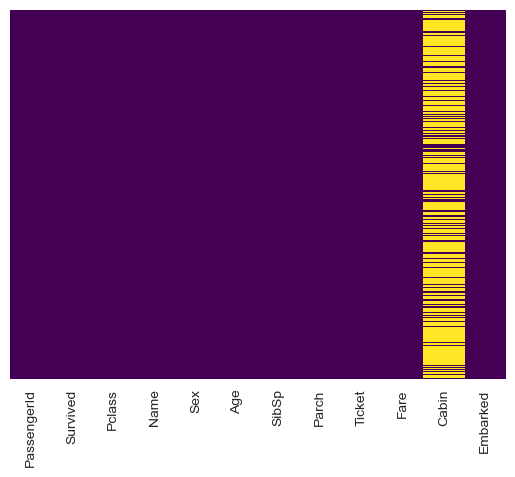

In [99]:
# Checking the heatmap to know weather there are any null values in age column
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
# Creating the backup data to prevent any loss
backup=titanic.copy()

In [101]:
# Droping the cabin column as it's not of any use
titanic.drop('Cabin',axis=1,inplace=True)

In [102]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [103]:
titanic.dropna(inplace=True)

In [104]:
# Getting the dummies value foe Sex and Embarked column for performing the binary logistic classification 
Sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [105]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [106]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [107]:
titanic['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [108]:
# Dropping the Sex, Embarked, name, Ticket column
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [109]:
# Concating the new Sex and Embarked column to dataset
titanic=pd.concat([titanic,Sex,embark],axis=1)

In [110]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [111]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Training and Testing Data

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training the Model

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lgmodel=LogisticRegression()
lgmodel.fit(x_train,y_train)

LogisticRegression()

## Predicting Test Data

In [117]:
predictions=lgmodel.predict(x_test)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 39  65]]
